## Here we'll build all the figures for the manuscriptusing the saved results from each notebook

In [2]:
import os 
import pandas as pd
import scipy.stats
import numpy as np
import statsmodels
import seaborn as sns
from plotnine import *
import plotly.express as px

%matplotlib inline

## Synthetic Coms

In [ ]:
small_coms = pd.read_csv('../results/

but_small = coms_small[coms_small.metabolite.str.contains('but')]
ac_small = coms_small[coms_small.metabolite.str.contains('ac')]
but_big = coms_big[coms_big.metabolite.str.contains('but')]
ac_big = coms_big[coms_big.metabolite.str.contains('ac')]

In [ ]:
fig_1 = px.scatter(but_small, 
                x = 'measured',
                y = 'predicted', 
                trendline = 'ols',
                color_discrete_sequence = ['cadetblue'],
                trendline_color_override = "black",
                template = 'plotly_white',
                labels={
                     "predicted": "",
                     "measured": ""
                },
                title = "Butyrate",
                width=700, height=600)
fig_1.update_layout(font = dict(size = 24))
fig_1.update_xaxes(showgrid=False, zeroline=False)
fig_1.update_yaxes(showgrid=False, zeroline=False)

In [ ]:
fig_2 = px.scatter(but_big, 
                x = 'measured',
                y = 'predicted', 
                trendline = 'ols',
                color_discrete_sequence = ['cadetblue'],
                trendline_color_override = "black",
                template = 'plotly_white',
                labels={
                     "predicted": "",
                     "measured": ""
                },
                title = "Butyrate",
                width=700, height=600)
fig_2.update_layout(font = dict(size = 24))
fig_2.update_xaxes(showgrid=False, zeroline=False)
fig_2.update_yaxes(showgrid=False, zeroline=False)

In [ ]:
fig_1.write_image('/users/nbohmann/gibbons_ppa.png', scale = 2)
fig_2.write_image('/users/nbohmann/gibbons_but.png', scale = 2)

## Ex Vivos

### First we'll define the colors we want to use for each treatment

In [9]:
color_discrete_map={"Control": "cornflowerblue",
                    "Inulin": "coral",
                    "Pectin": "mediumseagreen"}

### Study A

In [11]:
study_a = pd.read_csv('../results/studyA.csv', index_col = 0)
study_a['treatment'] = study_a['treatment'].str.replace('PBS','Control').str.replace('inulin','Inulin')

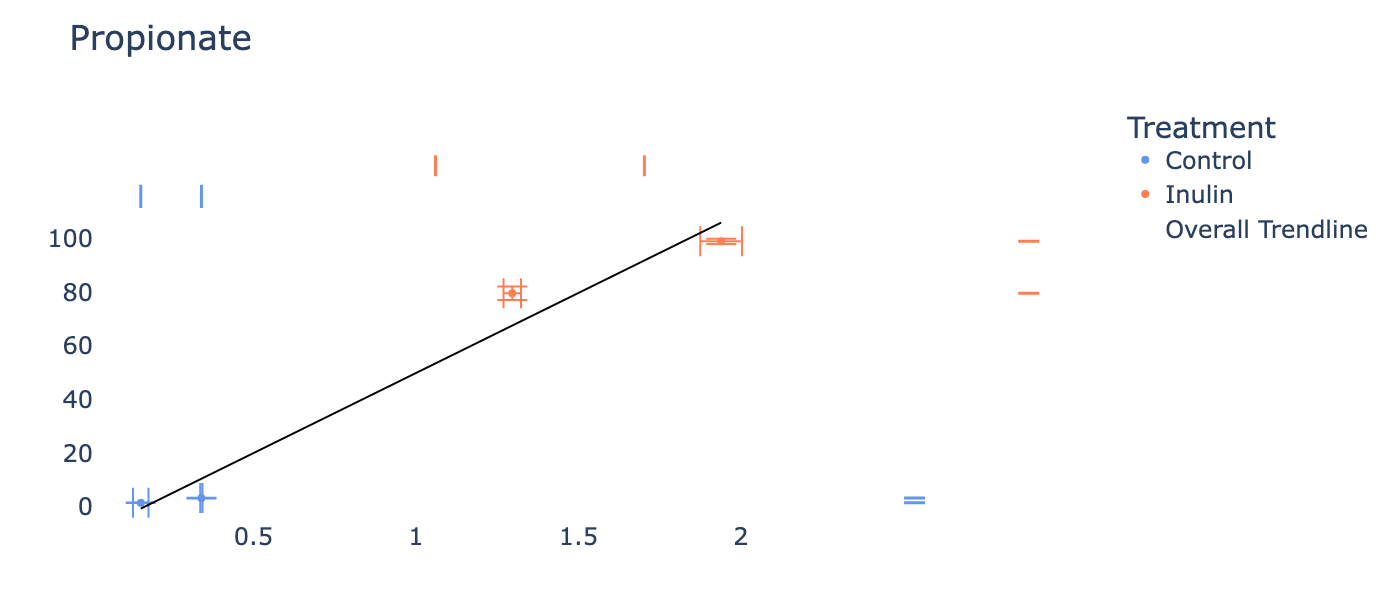

In [12]:
fig_1 = px.scatter(study_a, 
                x = 'flux_propionate',
                y = 'flux-predicted_propionate', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'std_propionate',
                error_y = 'std-predicted_propionate',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "flux_propionate": "",
                     "flux-predicted_propionate": "",
                     "treatment": "Treatment"
                 },
                title = "Propionate",
                width=700, height=600)
fig_1.update_layout(font = dict(size = 24))
fig_1.data[0]['marker']['size'] = 12 
fig_1.data[0].error_y.width = 15
fig_1.data[3]['marker']['size'] = 12
fig_1.data[3].error_y.width = 15
fig_1.data[0]['marker']['size'] = 8
fig_1.data[3]['marker']['size'] = 8
fig_1.data[1]['marker']['size'] = 27 
fig_1.data[2]['marker']['size'] = 15 
fig_1.data[4]['marker']['size'] = 15 
fig_1.data[5]['marker']['size'] = 15 
fig_1.data[1]['marker']['line']['width'] = 3
fig_1.data[2]['marker']['line']['width'] = 3
fig_1.data[4]['marker']['line']['width'] = 3
fig_1.data[5]['marker']['line']['width'] = 3
fig_1.data[7].update(line_width=0)
fig_1.data[8].update(line_width=0)
fig_1.update_xaxes(range =[.01,2.3],showgrid=False, zeroline=False)
fig_1.update_yaxes(range =[-5,110],showgrid=False, zeroline=False)
fig_1.data[4]['y'] = 10*[40]
fig_1.data[5]['x'] = 10*[2]
fig_1

In [ ]:
fig_2 = px.scatter(scfas_1, 
                x = 'Butyrate',
                y = 'Butyrate - Predicted', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'but_dev_meas',
                error_y = 'but_dev',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Butyrate": "",
                     "Butyrate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Butyrate",
                size_max = 40,
                width=700, height=600)
fig_2.update_layout(font = dict(size = 24))
fig_2.data[0]['marker']['size'] = 12 #top blue
fig_2.data[0].error_y.width = 15
fig_2.data[3]['marker']['size'] = 12 #top blue
fig_2.data[3].error_y.width = 15
fig_2.data[1]['marker']['size'] = 27 #top blue
fig_2.data[2]['marker']['size'] = 15 #right blue
fig_2.data[4]['marker']['size'] = 15 #top orange
fig_2.data[5]['marker']['size'] = 15 #right orange
fig_2.data[1]['marker']['line']['width'] = 3
fig_2.data[2]['marker']['line']['width'] = 3
fig_2.data[4]['marker']['line']['width'] = 3
fig_2.data[5]['marker']['line']['width'] = 3
fig_2.data[7].update(line_width=0)
fig_2.data[8].update(line_width=0)
fig_2.update_xaxes(range = [.01, 4],showgrid=False, zeroline=False)
fig_2.update_yaxes(range=[0,45],showgrid=False, zeroline=False)
fig_2.data[4]['y'] = 10*[14]
fig_2.data[5]['x'] = 10*[2]
fig_2

In [ ]:
fig_3 = px.scatter(scfas_1, 
                x = 'Acetate',
                y = 'Acetate - Predicted', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'ac_dev_meas',
                error_y = 'ac_dev',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Acetate":"",
                     "Acetate - Predicted":"",
                     "treatment": "Treatment"
                 },
                title = "Acetate",
                width=700, height=600)
fig_3.update_layout(font = dict(size = 24))
fig_3.data[0]['marker']['size'] = 12 #top blue
fig_3.data[0].error_y.width = 15
fig_3.data[3]['marker']['size'] = 12 #top blue
fig_3.data[3].error_y.width = 15
fig_3.data[1]['marker']['size'] = 27 #top blue
fig_3.data[2]['marker']['size'] = 15 #right blue
fig_3.data[4]['marker']['size'] = 15 #top orange
fig_3.data[5]['marker']['size'] = 15 #right orange
fig_3.data[1]['marker']['line']['width'] = 3
fig_3.data[2]['marker']['line']['width'] = 3
fig_3.data[4]['marker']['line']['width'] = 3
fig_3.data[5]['marker']['line']['width'] = 3
fig_3.data[7].update(line_width=0)
fig_3.data[8].update(line_width=0)
fig_3.update_xaxes(showgrid=False, zeroline=False)
fig_3.update_yaxes(range=[0,340],showgrid=False,  zeroline=False)
fig_3.data[4]['y'] = 10*[100]
fig_3.data[5]['x'] = 10*[8]
fig_3

In [ ]:
fig_1.write_image('/users/nbohmann/gibbons_ppa.png', scale = 2)
fig_2.write_image('/users/nbohmann/gibbons_but.png', scale = 2)
fig_3.write_image('/users/nbohmann/gibbons_ac.png', scale = 2)

### Study B

In [ ]:
os.chdir('/proj/gibbons/nbohmann/exvivo/scfa_paper/')
scfas_2 = pd.read_csv('hamaker.csv',index_col = 0)
scfas_2[scfas_2.columns[7:]] = scfas_2[scfas_2.columns[7:]]/np.sqrt(10)
scfas_2

In [ ]:
fig_1 = px.scatter(scfas_2, 
                x = 'Propionate',
                y = 'Propionate - Predicted', 
                color = 'Treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'ppa-devs_meas',
                error_y = 'ppa-devs',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Propionate": "",
                     "Propionate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Propionate",
                size_max = 40,
                width=700, height=600)
fig_1.update_layout(font = dict(size = 24))
fig_1.data[0]['marker']['size'] = 12 #top blue
fig_1.data[0].error_y.width = 15
fig_1.data[3]['marker']['size'] = 12 #top blue
fig_1.data[3].error_y.width = 15
fig_1.data[1]['marker']['size'] = 35 #top blue
fig_1.data[2]['marker']['size'] = 15 #right blue
fig_1.data[4]['marker']['size'] = 15 #top orange
fig_1.data[5]['marker']['size'] = 15 #right orange
fig_1.data[1]['marker']['line']['width'] = 3
fig_1.data[2]['marker']['line']['width'] = 3
fig_1.data[4]['marker']['line']['width'] = 3
fig_1.data[5]['marker']['line']['width'] = 3
fig_1.data[7].update(line_width=0)
fig_1.data[8].update(line_width=0)
fig_1.update_xaxes(range=[.01,3.2],showgrid=False, zeroline=False)
fig_1.update_yaxes(range=[-5,135],showgrid=False, zeroline=False)
fig_1.data[4]['y'] = 10*[55]
fig_1.data[5]['x'] = 10*[1.6]
fig_1

In [ ]:
stat_micom, p_micom = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Butyrate - Predicted'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Butyrate - Predicted'])
stat_exp, p_exp = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Butyrate'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Butyrate'])
print('MICOM:'+str(p_micom.round(6)))
print('Experimental:'+str(p_exp.round(7)))

In [ ]:
fig_2 = px.scatter(scfas_2, 
                x = 'Butyrate',
                y = 'Butyrate - Predicted', 
                color = 'Treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'but-devs_meas',
                error_y = 'but-devs',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Butyrate": "",
                     "Butyrate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Butyrate",
                size_max = 40,
                width=700, height=600)
fig_2.update_layout(font = dict(size = 24))
fig_2.data[0]['marker']['size'] = 12 #top blue
fig_2.data[0].error_y.width = 15
fig_2.data[3]['marker']['size'] = 12 #top blue
fig_2.data[3].error_y.width = 15
fig_2.data[1]['marker']['size'] = 35 #top blue
fig_2.data[2]['marker']['size'] = 15 #right blue
fig_2.data[4]['marker']['size'] = 15 #top orange
fig_2.data[5]['marker']['size'] = 15 #right orange
fig_2.data[1]['marker']['line']['width'] = 3
fig_2.data[2]['marker']['line']['width'] = 3
fig_2.data[4]['marker']['line']['width'] = 3
fig_2.data[5]['marker']['line']['width'] = 3
fig_2.data[7].update(line_width=0)
fig_2.data[8].update(line_width=0)
fig_2.update_xaxes(range = [-.5,3.8],showgrid=False, zeroline=False)
fig_2.update_yaxes(range=[.01,36],showgrid=False, zeroline=False)
fig_2.data[4]['y'] = 10*[14]
fig_2.data[5]['x'] = 10*[2]
fig_2

In [ ]:
stat_micom, p_micom = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Butyrate - Predicted'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Butyrate - Predicted'])
stat_exp, p_exp = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Butyrate'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Butyrate'])
print('MICOM:'+str(p_micom.round(4)))
print('Experimental:'+str(p_exp.round(7)))

In [ ]:
fig_3 = px.scatter(scfas_2, 
                x = 'Acetate',
                y = 'Acetate - Predicted', 
                color = 'Treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'ac-devs_meas',
                error_y = 'ac-devs',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Acetate":"",
                     "Acetate - Predicted":"",
                     "treatment": "Treatment"
                 },
                title = "Acetate",
                width=700, height=600)
fig_3.update_layout(font = dict(size = 24))
fig_3.data[0]['marker']['size'] = 12 #top blue
fig_3.data[0].error_y.width = 15
fig_3.data[0].error_x.width = 15
fig_3.data[3]['marker']['size'] = 12 #top blue
fig_3.data[3].error_y.width = 15
fig_3.data[3].error_x.width = 15
fig_3.data[1]['marker']['size'] = 35 #top blue
fig_3.data[2]['marker']['size'] = 35 #right blue
fig_3.data[4]['marker']['size'] = 15 #top orange
fig_3.data[5]['marker']['size'] = 15 #right orange
fig_3.data[1]['marker']['line']['width'] = 3
fig_3.data[2]['marker']['line']['width'] = 3
fig_3.data[4]['marker']['line']['width'] = 3
fig_3.data[5]['marker']['line']['width'] = 3
fig_3.data[7].update(line_width=0)
fig_3.data[8].update(line_width=0)
fig_3.update_xaxes(range = [-1,20],showgrid=False, zeroline=False)
fig_3.update_yaxes(range=[0.1,310],showgrid=False,  zeroline=False)
fig_3.data[4]['y'] = 10*[100]
fig_3.data[5]['x'] = 10*[8]
fig_3

In [ ]:
stat_micom, p_micom = scipy.stats.ttest_rel(scfas_3[scfas_3.index.str.contains('PECT')]['Butyrate - Predicted'],
                      scfas_3[scfas_3.index.str.contains('CTRL')]['Butyrate - Predicted'])
stat_exp, p_exp = scipy.stats.ttest_rel(scfas_3[scfas_3.index.str.contains('PECT')]['Butyrate'],
                      scfas_3[scfas_3.index.str.contains('CTRL')]['Butyrate'])
print('MICOM:'+str(p_micom.round(10)))
print('Experimental:'+str(p_exp.round(10)))

In [ ]:
fig_1.write_image('/users/nbohmann/hamaker_ppa.png', scale = 2)
fig_2.write_image('/users/nbohmann/hamaker_but.png', scale = 2)
fig_3.write_image('/users/nbohmann/hamaker_ac.png', scale = 2)

In [ ]:
stat_micom, p_micom = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Acetate - Predicted'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Acetate - Predicted'])
stat_exp, p_exp = scipy.stats.ttest_rel(scfas_2[scfas_2.index.str.contains('Blank')]['Acetate'],
                      scfas_2[scfas_2.index.str.contains('Pectin')]['Acetate'])
print('MICOM:'+str(p_micom.round(10)))
print('Experimental:'+str(p_exp.round(10)))

### Study C

In [ ]:
os.chdir('/proj/gibbons/nbohmann/exvivo/scfa_paper/')
scfas_3 = pd.read_csv('gurry1.csv',index_col = 0)
scfas_3

In [ ]:
fig_1 = px.scatter(scfas_3, 
                x = 'Acetate',
                y = 'Acetate - Predicted', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'ace_dev',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Acetate": "",
                     "Acetate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Acetate",
                width=700, height=600)
fig_1.update_layout(font = dict(size = 24))
fig_1.data[0]['marker']['size'] = 12 #top blue
fig_1.data[0].error_x.width = 15
fig_1.data[3]['marker']['size'] = 12 #top blue
fig_1.data[3].error_x.width = 15
fig_1.data[6]['marker']['size'] = 12
fig_1.data[6].error_x.width = 15
fig_1.data[1]['marker']['size'] = 30
fig_1.data[2]['marker']['size'] = 15 
fig_1.data[4]['marker']['size'] = 15 
fig_1.data[5]['marker']['size'] = 15 
fig_1.data[7]['marker']['size'] = 15 
fig_1.data[8]['marker']['size'] = 15 
fig_1.data[1]['marker']['line']['width'] = 3
fig_1.data[2]['marker']['line']['width'] = 3
fig_1.data[4]['marker']['line']['width'] = 3
fig_1.data[5]['marker']['line']['width'] = 3
fig_1.data[7]['marker']['line']['width'] = 3
fig_1.data[8]['marker']['line']['width'] = 3
fig_1.data[10].update(line_width=0)
fig_1.data[11].update(line_width=0)
fig_1.update_xaxes(range = [-2,10.5],showgrid=False,zeroline=False)
fig_1.update_yaxes(range = [0.1,360],showgrid=False,zeroline=False)
fig_1.data[4]['y'] = 10*[200]
fig_1.data[5]['x'] = 10*[6]
fig_1.data[7]['y'] = 10*[120]
fig_1.data[8]['x'] = 10*[3]
fig_1

In [ ]:
fig_2 = px.scatter(scfas_3, 
                x = 'Propionate',
                y = 'Propionate - Predicted', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'ppa_dev',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Propionate": "",
                     "Propionate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Propionate",
                width=700, height=600)
fig_2.update_layout(font = dict(size = 24))
fig_2.data[0]['marker']['size'] = 12 #top blue
fig_2.data[0].error_x.width = 15
fig_2.data[3]['marker']['size'] = 12 #top blue
fig_2.data[3].error_x.width = 15
fig_2.data[6]['marker']['size'] = 12
fig_2.data[6].error_x.width = 15
fig_2.data[1]['marker']['size'] = 30
fig_2.data[2]['marker']['size'] = 15 
fig_2.data[4]['marker']['size'] = 15 
fig_2.data[5]['marker']['size'] = 15 
fig_2.data[7]['marker']['size'] = 15 
fig_2.data[8]['marker']['size'] = 15 
fig_2.data[1]['marker']['line']['width'] = 3
fig_2.data[2]['marker']['line']['width'] = 3
fig_2.data[4]['marker']['line']['width'] = 3
fig_2.data[5]['marker']['line']['width'] = 3
fig_2.data[7]['marker']['line']['width'] = 3
fig_2.data[8]['marker']['line']['width'] = 3
fig_2.data[10].update(line_width=0)
fig_2.data[11].update(line_width=0)
fig_2.update_xaxes(showgrid=False,zeroline=False)
fig_2.update_yaxes(range = [-10,190],showgrid=False,zeroline=False)
fig_2.data[4]['y'] = 10*[100]
fig_2.data[5]['x'] = 10*[5]
fig_2.data[7]['y'] = 10*[60]
fig_2.data[8]['x'] = 10*[3]
fig_2

In [ ]:
fig_3 = px.scatter(scfas_3, 
                x = 'Butyrate',
                y = 'Butyrate - Predicted', 
                color = 'treatment', 
                color_discrete_map = color_discrete_map,
                error_x = 'but_dev',
                trendline = 'ols',
                trendline_scope="overall",
                trendline_color_override = "black",
                marginal_x="rug", 
                marginal_y="rug",
                template = 'plotly_white',
                labels={
                     "Butyrate": "",
                     "Butyrate - Predicted": "",
                     "treatment": "Treatment"
                 },
                title = "Butyrate",
                width=700, height=600)
fig_3.update_layout(font = dict(size = 24))
fig_3.data[0]['marker']['size'] = 12 #top blue
fig_3.data[0].error_x.width = 15
fig_3.data[3]['marker']['size'] = 12 #top blue
fig_3.data[3].error_x.width = 15
fig_3.data[6]['marker']['size'] = 12
fig_3.data[6].error_x.width = 15
fig_3.data[1]['marker']['size'] = 15
fig_3.data[2]['marker']['size'] = 15 
fig_3.data[4]['marker']['size'] = 15 
fig_3.data[5]['marker']['size'] = 15 
fig_3.data[7]['marker']['size'] = 15 
fig_3.data[8]['marker']['size'] = 15 
fig_3.data[1]['marker']['line']['width'] = 3
fig_3.data[2]['marker']['line']['width'] = 3
fig_3.data[4]['marker']['line']['width'] = 3
fig_3.data[5]['marker']['line']['width'] = 3
fig_3.data[7]['marker']['line']['width'] = 3
fig_3.data[8]['marker']['line']['width'] = 3
fig_3.data[10].update(line_width=0)
fig_3.data[11].update(line_width=0)
fig_3.update_xaxes(showgrid=False,zeroline=False)
fig_3.update_yaxes(showgrid=False,zeroline=False)
fig_3.data[4]['y'] = 10*[24]
fig_3.data[5]['x'] = 10*[5]
fig_3.data[7]['y'] = 10*[12]
fig_3.data[8]['x'] = 10*[3]
fig_3

In [ ]:
stat_micom, p_micom = scipy.stats.ttest_rel(scfas_1[scfas_1.treatment.str.contains('Control')]['Acetate - Predicted'],
                      scfas_1[scfas_1.treatment.str.contains('Inulin')]['Acetate - Predicted'])
stat_exp, p_exp = scipy.stats.ttest_rel(scfas_1[scfas_1.treatment.str.contains('Control')]['Acetate'],
                      scfas_1[scfas_1.treatment.str.contains('Inulin')]['Acetate'])
print('MICOM:'+str(p_micom.round(10)))
print('Experimental:'+str(p_exp.round(10)))

In [ ]:
fig_1.write_image('/users/nbohmann/gurry_ppa.png', scale = 2)
fig_2.write_image('/users/nbohmann/gurry_ppa.png', scale = 2)
fig_3.write_image('/users/nbohmann/gurry_ac.png', scale = 2)

## Sonnenburg

In [ ]:
fiber = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/sonnenburg.csv', index_col = 0)
fiber['timepoint'] = fiber['timepoint'].astype('str')
fiber = fiber[(~fiber['timepoint'].str.contains('8'))&(~fiber['timepoint'].str.contains('9'))]
fiber['timepoint'] = fiber['timepoint'].astype('int')
fiber

In [ ]:
fiber_sub = fiber[fiber['group'] == 'HighInflammation']

stat_high, p_value = scipy.stats.pearsonr(fiber_sub['timepoint'],fiber_sub['total'])

r_value_high = (stat_high**2).round(4)
r_value_high = "R\u00b2: "+(r_value_high).astype('str')
p_value_high = "p: "+(p_value.round(4).astype('str'))

fiber_sub = fiber[fiber['group'] == 'LowInflammationI']

stat_low1, p_value = scipy.stats.pearsonr(fiber_sub['timepoint'],fiber_sub['total'])
r_value_low1 = (stat_low1**2).round(4)
r_value_low1 = "R\u00b2: "+(r_value_low1).astype('str')
p_value_low1 = "p: "+(p_value.round(4).astype('str'))

fiber_sub = fiber[fiber['group'] == 'LowInflammationII']

stat_low2, p_value = scipy.stats.pearsonr(fiber_sub['timepoint'],fiber_sub['total'])

r_value_low2 = (stat_low2**2).round(4)
r_value_low2 = "R\u00b2: "+(r_value_low2).astype('str')
p_value_low2 = "p: "+(p_value.round(4).astype('str'))

In [ ]:
plt1 = (ggplot(fiber,
    aes(x = 'timepoint', y = 'total'))
    +geom_point(color = 'cadetblue')
    +geom_smooth(method = 'lm')
    +labs(x = 'Timepoint', y = 'Predicted Butyrate \n and Propionate ($\dfrac{mmol}{gDW*h}$)')
    +scale_color_gradient(low = 'lightblue', high = 'cadetblue')
    +facet_wrap(facets = 'group', labeller = 'label_context')
    +theme(text = element_text(size=20),panel_background=element_rect(fill = "white",
                                colour = "white",size = 0.5, linetype = "solid"),panel_grid= element_blank(),
                                axis_line = element_line(size = 2, linetype = "solid",colour = "black"),
                                axis_line_y = element_blank(), axis_text_x=element_text(rotation = 20, hjust = 1)))
plt1

In [ ]:
plt2 = (ggplot(fiber,
    aes(x = 'timepoint', y = 'ac[e]'))
    +geom_point(color = 'cadetblue')
    +geom_smooth(method = 'lm')
    +labs(x = 'Timepoint', y = 'Predicted Acetate ($\dfrac{mmol}{gDW*h}$)')
    +scale_color_gradient(low = 'lightblue', high = 'cadetblue')
    +facet_wrap(facets = 'group', labeller = 'label_context')
    +theme(text = element_text(size=20),panel_background=element_rect(fill = "white",
                                colour = "white",size = 0.5, linetype = "solid"),panel_grid= element_blank(),
                                axis_line = element_line(size = 2, linetype = "solid",colour = "black"),
                                axis_line_y = element_blank(), axis_text_x=element_text(rotation = 20, hjust = 1)))
plt2

In [ ]:
plt3 = (ggplot(
    fiber, aes(x = 'group', y = 'total'))
        +geom_boxplot(aes(groups = 'group'), fill = 'cadetblue', width = 0.4)
        +ylim(200,450)
        +labs(x = 'Immune Response Group', y = 'Predicted Butyrate \n and Propionate ($\dfrac{mmol}{gDW*h}$)',
             title = 'Total Butyrate + Propionate Production \n Across Intervention')
        +scale_x_discrete(limits = ['HighInflammation','LowInflammationI','LowInflammationII'],
                          labels = ['High \n Inf.', 'Low \n Inf. I', 'Low \n Inf. II'])
         +theme(text = element_text(size=20, color = 'black'),panel_background=element_rect(fill = "white",
                                colour = "white",size = 0.5, linetype = "solid"),panel_grid= element_blank(),
                                axis_line = element_line(size = 2, linetype = "solid",colour = "black"),
                                legend_position='right',axis_text_x=element_text(rotation = 20, hjust = 1)))
plt3

In [ ]:
plt4 = (ggplot(
    fiber, aes(x = 'group', y = 'ac[e]'))
        +geom_boxplot(aes(groups = 'group'), fill = 'cadetblue', width = 0.4)
        +ylim(200,450)
        +labs(x = 'Immune Response Group', y = 'Predicted Acetate ($\dfrac{mmol}{gDW*h}$)',
             title = 'Total Butyrate + Propionate Production \n Across Intervention')
        +scale_x_discrete(limits = ['HighInflammation','LowInflammationI','LowInflammationII'],
                          labels = ['High \n Inf.', 'Low \n Inf. I', 'Low \n Inf. II'])
         +theme(text = element_text(size=20, color = 'black'),panel_background=element_rect(fill = "white",
                                colour = "white",size = 0.5, linetype = "solid"),panel_grid= element_blank(),
                                axis_line = element_line(size = 2, linetype = "solid",colour = "black"),
                                legend_position='right',axis_text_x=element_text(rotation = 20, hjust = 1)))
plt4

In [ ]:
ggsave(plt1,'/users/nbohmann/butyratepropionate_pertime.png', dpi = 300)
ggsave(plt2,'/users/nbohmann/butyratepropionate_total.png', dpi = 300)
ggsave(plt3,'/users/nbohmann/acetate_pertime.png', dpi = 300)
ggsave(plt4,'/users/nbohmann/acetate_total.png', dpi = 300)

## Arivale

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

arivale = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/arivale.csv',index_col = 0)
df = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/arivale_hits.csv',index_col = 0)
df
arivale.sample_id.nunique()

In [ ]:
df_pivot = pd.pivot_table(df, columns = 'measure', 
                          index = 'display', values = 'rho') #pivot for heatmap values
df_pivot = df_pivot[['Butyrate','Propionate','Acetate','Total']]
pvals = pd.pivot_table(df, columns = 'measure',
                       index = 'display', values = 'p_corrected') #pivot for heatmap annotations
pvals = pvals[['Butyrate','Propionate','Acetate','Total']]
pvals[pvals>0.05] = np.nan
pvals[(pvals<=0.05)&(pvals>0.01)] = 100
pvals[(pvals<=0.01)&(pvals>0.001)] = 200
pvals[pvals<0.001] = 300
pvals = pvals.replace(100,'*').replace(200,'**').replace(300,'***').replace(np.nan,'')

sns.set(font_scale= 3.1)# set font
f, ax = plt.subplots(figsize=(12,24)) #initialize plot
cmap = sns.diverging_palette(230, 10, sep=20, as_cmap=True)
ax = sns.heatmap(df_pivot, center = 0, cmap = cmap, annot = pvals, #make heatmap with annotations
                 fmt='', annot_kws={'fontsize': 18, 'color':'white',
                           'verticalalignment': 'center'})
ax.get_xticklabels()
ax.set(xlabel = None)
ax.set(ylabel = None)

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(arivale['Acetate'], 
                                                                     arivale['Butyrate'])
r_value = (r_value**2).round(4)
r_value = "R\u00b2: "+(r_value).astype('str')
p_value = "p: "+(p_value.round(42).astype('str'))




plt1 = (ggplot(
    arivale, aes(x = 'Butyrate',y = 'Acetate'))
    +geom_point(color = 'cadetblue')
    +geom_smooth()
    +annotate('text', x = 40, y = 85, label = r_value, size = 15)
    +annotate('text', x= 40, y = 79, label = 'p: <0.001', size = 15)
    +labs(x= 'Predicted Butyrate \n ($\dfrac{mmol}{gDW*h}$)',
          y = 'Predicted Acetate \n ($\dfrac{mmol}{gDW*h}$)',
          title = 'Acetate vs. Butyrate')
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right')
)
plt1

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(arivale['Butyrate'], 
                                                                     arivale['Propionate'])
r_value = (r_value**2).round(4)
r_value = "R\u00b2: "+(r_value).astype('str')
p_value = "p: "+(p_value.astype('str'))



plt2 = (ggplot(
    arivale, aes(x = 'Propionate',y = 'Butyrate'))
    +geom_point(color = 'cadetblue')
    +geom_smooth()
    +annotate('text', x = 16, y = 48, label = r_value, size = 15)
    +annotate('text', x= 16, y = 44, label = 'p: <0.001', size = 15)
    +labs(x= 'Predicted Propionate \n ($\dfrac{mmol}{gDW*h}$)',
          y = 'Predicted Butyrate \n ($\dfrac{mmol}{gDW*h}$)',
          title = 'Butyrate vs. Propionate')
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right')
)
plt2

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(arivale['Propionate'], 
                                                                     arivale['Acetate'])
r_value = (r_value**2).round(4)
r_value = "R\u00b2: "+(r_value).astype('str')
p_value = "p: "+(p_value.round(19).astype('str'))



plt3 = (ggplot(
    arivale, aes(x = 'Propionate',y = 'Acetate'))
    +geom_point(color = 'cadetblue')
    +geom_smooth()
    +annotate('text', x = 18, y = 68, label = r_value, size = 15)
    +annotate('text', x= 18, y = 64, label = 'p: <0.001', size = 15)
    +labs(x= 'Predicted Propionate \n ($\dfrac{mmol}{gDW*h}$)',
          y = 'Predicted Acetate \n ($\dfrac{mmol}{gDW*h}$)',
          title = 'Acetate vs. Propionate')
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right')
)
plt3

In [ ]:
ggsave(plt1, '/users/nbohmann/but_ac.png', dpi = 1000)
ggsave(plt2, '/users/nbohmann/ppa_but.png', dpi = 1000)
ggsave(plt3, '/users/nbohmann/ac_ppa.png', dpi = 1000)

## Diet Interventions

In [ ]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

In [ ]:
os.chdir('/proj/gibbons/nbohmann/exvivo/scfa_paper/')
butyrate = pd.read_csv('diet_flip.csv',index_col = 0)
butyrate['diet'] = butyrate['diet'].str.replace('high_fiber','High Fiber')
butyrate_pvt = pd.pivot_table(butyrate,index = 'sample_id',columns = 'diet', values = 'but')
butyrate_pvt['change'] = percentage_change(butyrate_pvt['EU'],butyrate_pvt['High Fiber'])
butyrate_pvt.sort_values(by = 'change')
nonresponders = butyrate_pvt[(butyrate_pvt['EU']<10)&(butyrate_pvt['change']<20)]
regressors = butyrate_pvt[(butyrate_pvt['EU']>19.9)&(butyrate_pvt['change']<0)]
box_nonresponders = [nonresponders[['EU','High Fiber']].min().min(), nonresponders[['EU','High Fiber']].max().max()]
box_regressors = [regressors[['EU','High Fiber']].min().min(), regressors[['EU','High Fiber']].max().max()]

In [ ]:
hist_plt = (ggplot(
    butyrate,aes(x = 'but'))
    +annotate(geom_rect, xmin=box_nonresponders[0], xmax=box_nonresponders[1], ymin=0, ymax=float('inf'),
              fill = 'darkgreen', alpha=0.3)
    +annotate(geom_rect, xmin=box_regressors[0], xmax=box_regressors[1], ymin=0, ymax=float('inf'),
              fill = 'orange', alpha=0.3)
    +geom_density(aes(fill = 'diet'))
    +labs(x = 'Butyrate Production ($\dfrac{mmol}{gDW*h}$)',y = 'Fraction',
          color = 'Butyrate Production Quantile, EU Diet')
    +scale_fill_discrete(name = 'Diet', labels = ['European','High Fiber'])
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right'))
hist_plt

In [ ]:
scipy.stats.ttest_ind(regressors[regressors['Diet']=='Optimal']['Butyrate'],
                      regressors[regressors['Diet']=='Euro']['Butyrate'])

In [ ]:
nonresponders = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/intervention.csv').rename(
    columns = {'Unnamed: 0':'sample_id'})
nonresponders['Optimal'] = nonresponders.max(axis = 1)
nonresponders = pd.melt(nonresponders[['sample_id','Euro','High-Fiber','Optimal']], id_vars = 'sample_id', 
                      var_name = 'Diet',value_name = 'Butyrate')
nonresponders['title'] = 'Non-Responders'

In [ ]:
facet_plt1 = (ggplot(
    nonresponders,aes(x = 'Butyrate'))
    +geom_density(aes(fill = 'Diet'), alpha = 0.7)
    +labs(x = 'Butyrate Production ($\dfrac{mmol}{gDW*h}$)',y = 'Fraction',
          color = 'Butyrate Production Quantile, Western Diet')
    +scale_fill_manual(values = ['#db5e57','#57d2db','navy'])
    +facet_wrap('title')
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
           strip_background_x = element_text(color = 'darkgreen', alpha = 0.3),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right'))
facet_plt1

In [ ]:
regressors = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/intervention2.csv').rename(
    columns = {'Unnamed: 0':'sample_id'})
regressors['Optimal'] = regressors.max(axis = 1)
regressors = pd.melt(regressors[['sample_id','Euro','High-Fiber','Optimal']], id_vars = 'sample_id', 
                      var_name = 'Diet',value_name = 'Butyrate')
regressors['title'] = 'Regressors'

In [ ]:
facet_plt2 = (ggplot(
    regressors,aes(x = 'Butyrate'))
    +geom_density(aes(fill = 'Diet'), alpha = 0.7)
    +labs(x = 'Butyrate Production ($\dfrac{mmol}{gDW*h}$)',y = 'Fraction',
          color = 'Butyrate Production Quantile, Western Diet')
    +scale_fill_manual(values = ['#db5e57','#57d2db','navy'])
    +facet_wrap('title')
    +theme(text = element_text(size=20),
       panel_background=element_rect(fill = "white", colour = "white",size = 0.5, linetype = "solid"),
       panel_grid=element_blank(),
           strip_background_x = element_text(color = 'orange', alpha = 0.3),
       axis_line = element_line(size = 2, linetype = "solid", colour = "black"),
       legend_title=element_blank(), legend_position='right'))
facet_plt2

In [ ]:
euro = intervention[intervention.Diet.str.contains('Euro')]['Butyrate']
hf = intervention[intervention.Diet.str.contains('High-Fiber')]['Butyrate']
op = intervention[intervention.Diet.str.contains('Optimal')]['Butyrate']
scipy.stats.ttest_ind(hf,op)

In [ ]:
ggsave(facet_plt1, '/users/nbohmann/facet_plot1.png', dpi = 300)
ggsave(facet_plt2, '/users/nbohmann/facet_plot2.png', dpi = 300)
ggsave(hist_plt, '/users/nbohmann/hist_plot.png', dpi = 300)

In [ ]:
intervention = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/intervention.csv').drop(
    columns = 'Unnamed: 0')
intervention.index = (['Non-Responders'])*len(intervention)
intervention2 = pd.read_csv('/proj/gibbons/nbohmann/exvivo/scfa_paper/intervention2.csv').drop(
    columns = 'Unnamed: 0')
intervention2.index = (['Regressors'])*len(intervention2)
intervention = pd.concat([intervention, intervention2])
intervention = intervention.sort_values(by = ['Euro','High-Fiber','Euro + Pectin', 'HF + Pectin',
                                          'Euro + Inulin', 'HF + Inulin','Euro + Probiotic', 'HF + Probiotic'])
intervention = intervention.rename(columns = {'Euro':'European'})
# intervention = np.log(intervention)
max_list = intervention.rename(columns = {'European':0,'High-Fiber':1,'Euro + Pectin':2, 'HF + Pectin':3,
                                          'Euro + Inulin':4, 'HF + Inulin':5,'Euro + Probiotic':6,
                                          'HF + Probiotic':7}
                              ).idxmax(axis = 'columns')
intervention

In [ ]:
from matplotlib.patches import Rectangle

lut = {'Non-Responders':'#b2d0b1', 'Regressors':'#fee3b2'}
row_colors = intervention.index.map(lut)

sns.set(font_scale= 1.5)# set font
cmap = sns.diverging_palette(230, 200, sep=20, as_cmap=True)
ax = sns.clustermap(intervention.T,cmap = 'Reds',figsize = (20,10), #make heatmap with annotations
                 fmt='',col_colors = row_colors, col_cluster = False, row_cluster = False,
                    annot_kws={'fontsize': 18, 'color':'white','verticalalignment': 'center'})

ax.ax_cbar.set_ylabel("Butyrate($\dfrac{mmol}{gDW*h}$)",size=20)
ax.ax_cbar.set_position((.1, .2, .03, .5))
for x in range(len(max_list)):
    ax.ax_heatmap.add_patch(Rectangle((x,max_list[x]), 1, 1, fill=False, edgecolor='black', lw=3))

ax